In [1]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [203]:
#import data
data_train = pd.read_csv('AIMS_Train.csv')
data_test=  pd.read_csv('AIMS_Test.csv')
data_submission = pd.read_csv('AIMS_SampleSubmission.csv')

In [ ]:
train.head()

In [ ]:
train.tail()

In [5]:
train.shape

(646214, 19)

In [204]:
#view the data types in the train data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646214 entries, 0 to 646213
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         646214 non-null  object 
 1   REGION          391246 non-null  object 
 2   TENURE          646214 non-null  object 
 3   MONTANT         419154 non-null  float64
 4   FREQUENCE_RECH  419154 non-null  float64
 5   REVENUE         428459 non-null  float64
 6   ARPU_SEGMENT    428459 non-null  float64
 7   FREQUENCE       428459 non-null  float64
 8   DATA_VOLUME     327544 non-null  float64
 9   ON_NET          409962 non-null  float64
 10  ORANGE          377516 non-null  float64
 11  TIGO            259060 non-null  float64
 12  ZONE1           50406 non-null   float64
 13  ZONE2           41072 non-null   float64
 14  MRG             646214 non-null  object 
 15  REGULARITY      646214 non-null  int64  
 16  TOP_PACK        375331 non-null  object 
 17  FREQ_TOP_P

In [7]:
# test.head()

In [8]:
# test.tail()

In [9]:
# test.shape

In [205]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114038 entries, 0 to 114037
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         114038 non-null  object 
 1   REGION          69081 non-null   object 
 2   TENURE          114038 non-null  object 
 3   MONTANT         74135 non-null   float64
 4   FREQUENCE_RECH  74135 non-null   float64
 5   REVENUE         75854 non-null   float64
 6   ARPU_SEGMENT    75854 non-null   float64
 7   FREQUENCE       75854 non-null   float64
 8   DATA_VOLUME     58049 non-null   float64
 9   ON_NET          72436 non-null   float64
 10  ORANGE          66823 non-null   float64
 11  TIGO            45908 non-null   float64
 12  ZONE1           9011 non-null    float64
 13  ZONE2           7217 non-null    float64
 14  MRG             114038 non-null  object 
 15  REGULARITY      114038 non-null  int64  
 16  TOP_PACK        66425 non-null   object 
 17  FREQ_TOP_P

In [11]:
# submission.head()

In [206]:
data_submission.shape

(114038, 2)

In [13]:
#Check how many levels are involved in each of the categorical features (object)

In [ ]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

In [ ]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

In [ ]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

In [ ]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

In [ ]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [207]:
#Check summary of numerical fields
data_train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,419154.0,5535.843227,7161.605662,10.0,1000.0,3000.0,7400.0,290500.0
FREQUENCE_RECH,419154.0,11.529891,13.270572,1.0,2.0,7.0,16.0,132.0
REVENUE,428459.0,5509.610712,7209.607287,1.0,1000.0,3000.0,7382.0,397968.0
ARPU_SEGMENT,428459.0,1836.543270,2403.197321,0.0,333.0,1000.0,2461.0,132656.0
FREQUENCE,428459.0,13.975855,14.689824,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,327544.0,3372.704974,13410.777186,0.0,0.0,260.0,2875.0,1823866.0
ON_NET,409962.0,277.649655,868.891990,0.0,5.0,27.0,157.0,36687.0
ORANGE,377516.0,95.274982,202.764409,0.0,7.0,29.0,99.0,6721.0
TIGO,259060.0,23.070601,63.219602,0.0,2.0,6.0,20.0,4174.0
ZONE1,50406.0,7.987779,39.546312,0.0,0.0,1.0,4.0,1867.0


In [208]:
#Check for missing values in training data
data_train.isnull().sum()

user_id                0
REGION            254968
TENURE                 0
MONTANT           227060
FREQUENCE_RECH    227060
REVENUE           217755
ARPU_SEGMENT      217755
FREQUENCE         217755
DATA_VOLUME       318670
ON_NET            236252
ORANGE            268698
TIGO              387154
ZONE1             595808
ZONE2             605142
MRG                    0
REGULARITY             0
TOP_PACK          270883
FREQ_TOP_PACK     270883
CHURN                  0
dtype: int64

In [209]:
#Check for missing values in test data
data_test.isnull().sum()

user_id                0
REGION             44957
TENURE                 0
MONTANT            39903
FREQUENCE_RECH     39903
REVENUE            38184
ARPU_SEGMENT       38184
FREQUENCE          38184
DATA_VOLUME        55989
ON_NET             41602
ORANGE             47215
TIGO               68130
ZONE1             105027
ZONE2             106821
MRG                    0
REGULARITY             0
TOP_PACK           47613
FREQ_TOP_PACK      47613
dtype: int64

In [22]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [210]:
data_train.drop(columns=['REGION', 'MRG', 'TOP_PACK', 'ZONE1', 'ZONE2'], inplace=True) #drop these columns

In [ ]:
train.head()

In [211]:
data_test.drop(columns=['REGION', 'MRG', 'TOP_PACK', 'ZONE1', 'ZONE2'], inplace=True)

In [ ]:
test.head()

In [212]:
data_train.shape

(646214, 14)

In [213]:
train = data_train[data_train.isnull().sum(axis=1) < 7]

In [248]:
test = data_test

In [27]:
#Fill NAs for train data

In [214]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
# train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
# train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [29]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,51d5367a58953904c14238c4dd7393f5c4fd0a88,K > 24 month,1000.000000,1.000000,990.000000,330.00000,1.000000,97.000000,1.000000,95.274982,23.070601,7.987779,7.547478,22,1.000000,0
1,3322a4900689f7f3cb14b8f9ea00778853f02d75,K > 24 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,223.000000,277.649655,95.274982,23.070601,7.987779,7.547478,4,9.284301,0
2,3b00ec4bfcc855c6f39b14a722e47ec6d15607e7,K > 24 month,700.000000,5.000000,1010.000000,337.00000,7.000000,566.000000,1.000000,3.000000,15.000000,0.000000,7.547478,8,3.000000,0
3,98c44b62c33c6a1d9dbcf5e918868419f249c4a8,K > 24 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,3372.704974,277.649655,95.274982,23.070601,7.987779,7.547478,3,9.284301,0
4,18bd8c41ecb503a2d9137e3f70bc1caf146a266d,K > 24 month,3000.000000,3.000000,2995.000000,998.00000,3.000000,3372.704974,277.649655,33.000000,23.070601,7.987779,7.547478,9,9.284301,0


In [215]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [31]:
#Fill NAs for test data

In [249]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
# test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
# test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [221]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,c1b31e7cef249f2b777d934886b787a433029263,K > 24 month,10600.0,18.0,11099.0,3700.0,22.0,4004.000000,60.0,123.000000,19.000000,61,9.0
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,K > 24 month,17900.0,36.0,18405.0,6135.0,44.0,0.000000,446.0,50.000000,28.000000,62,9.0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,K > 24 month,10000.0,10.0,10001.0,3334.0,27.0,3824.996588,0.0,93.000000,8.000000,45,12.0
4,96c6a822243654ae1fe5f5f887089681f806cb46,K > 24 month,500.0,1.0,500.0,167.0,1.0,3824.996588,8.0,14.000000,23.083612,8,1.0
7,ac8b3d775c3a2adb6859dc5c6498591aa0a904b0,K > 24 month,4000.0,4.0,4008.0,1336.0,7.0,10268.000000,0.0,96.151264,0.000000,60,4.0


In [222]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

1    403097
0    403097
Name: CHURN, dtype: int64

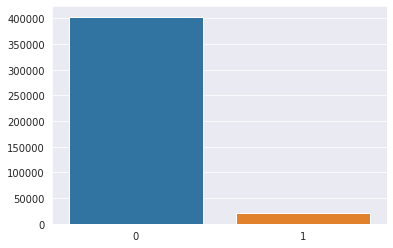

In [327]:
from sklearn.utils import resample

sb.barplot([0,1],train.CHURN.value_counts().values)

not_churned=train[train.CHURN==0]
churned=train[train.CHURN==1]

# upsample minority
churned_upsampled = resample(churned,
                          replace=True, # sample with replacement
                          n_samples=len(not_churned), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churned, churned_upsampled])

# check new class counts
upsampled.CHURN.value_counts()

## Machine Learning

In [223]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from catboost import CatBoostClassifier

In [329]:
dropcols = ['user_id', 'CHURN']
y = upsampled['CHURN']
x = upsampled.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(806194, 12)
(806194,)
(114038, 12)


In [37]:
#Split training data into train and test split

In [330]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(644955, 12)
(644955,)
(161239, 12)
(161239,)


In [39]:
#Further split X_train and y_train into train and validation sets

In [331]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state=1)

In [227]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(271093, 12)
(271093,)
+++++++
test
(84717, 12)
(84717,)
+++++++
validation
(67774, 12)
(67774,)


In [42]:
#Standardize numeric columns

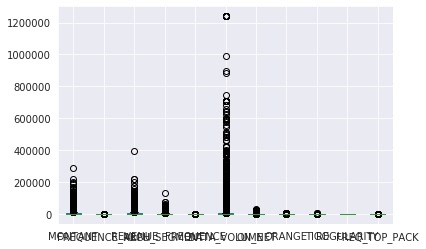

In [332]:
X_train.boxplot(column=num_cols)

In [333]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', # 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [334]:
scaler = StandardScaler()

scaler.fit(x[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [335]:
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [ ]:
X_train.head()

In [336]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_test.head()

In [337]:
test[num_cols] = scaler.transform(test[num_cols])

In [ ]:
test.head()

In [338]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [ ]:
X_val.head()

In [53]:
#Encode the TENURE column

In [339]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [340]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [341]:
X_val['TENURE'] = encoder.transform(X_val["TENURE"])

In [ ]:
test['TENURE'] = encoder.transform(test["TENURE"])

In [ ]:
X_train

In [59]:
##RandomForestClassifier Model

In [315]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

chi_selector = SelectKBest(f_classif, k=6)
chi_selector.fit(X_train, y_train)
chi_support = chi_selector.get_support()
cor_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(cor_feature)), 'selected features')

6 selected features


In [316]:
cor_feature

['MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'REGULARITY']

In [359]:
rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=200,
                              random_state=1,
                             verbose=True)

xg_class = xgb.XGBRFClassifier()

cat_classifier = CatBoostClassifier(max_depth=4, cat_features=['TENURE'])

In [363]:
#Fit model on data
# randmodel = rand.fit(X_train,y_train)

# xg_model = xg_class.fit(X_train,y_train)

cat_model = cat_classifier.fit(X_train,y_train)

Learning rate set to 0.148328
0:	learn: 0.6318367	total: 1.82s	remaining: 30m 16s
1:	learn: 0.5871628	total: 2.01s	remaining: 16m 43s
2:	learn: 0.5568450	total: 2.24s	remaining: 12m 24s
3:	learn: 0.5367614	total: 2.45s	remaining: 10m 10s
4:	learn: 0.5207096	total: 2.68s	remaining: 8m 53s
5:	learn: 0.5094936	total: 2.91s	remaining: 8m 2s
6:	learn: 0.5012065	total: 3.17s	remaining: 7m 29s
7:	learn: 0.4953315	total: 3.44s	remaining: 7m 6s
8:	learn: 0.4900413	total: 3.66s	remaining: 6m 43s
9:	learn: 0.4864376	total: 3.88s	remaining: 6m 24s
10:	learn: 0.4833474	total: 4.14s	remaining: 6m 11s
11:	learn: 0.4807126	total: 4.39s	remaining: 6m 1s
12:	learn: 0.4784616	total: 4.6s	remaining: 5m 49s
13:	learn: 0.4768285	total: 4.81s	remaining: 5m 38s
14:	learn: 0.4755817	total: 5.03s	remaining: 5m 30s
15:	learn: 0.4743700	total: 5.26s	remaining: 5m 23s
16:	learn: 0.4734446	total: 5.54s	remaining: 5m 20s
17:	learn: 0.4721191	total: 5.78s	remaining: 5m 15s
18:	learn: 0.4713611	total: 6.03s	remaining:

In [368]:
#Predict on the X_test data 
# randpred = randmodel.predict(X_test)

# xgpred = xg_model.predict(X_test)

catpred = cat_model.predict(X_test)

In [369]:
print("Acuracy")
accuracy_score(y_test, catpred)

Acuracy


0.8055123140183206

In [370]:
print("Recall")
recall_score(y_test, catpred)

Recall


0.8304297184773989

In [371]:
print("F1 Score")
f1_score(y_test, catpred)

F1 Score


0.8104016396911673

In [372]:
confusion_matrix(y_test, catpred)

array([[62861, 17674],
       [13685, 67019]])

In [292]:
# Making a submissio

In [ ]:
submission.head()

In [ ]:
test.head()

In [373]:
# subpred = randmodel.predict(test)
# subpred = xg_model.predict(test)
subpred = cat_model.predict(test)

In [376]:
len(subpred)

114038

In [356]:
submission["CHURN"] = subpred

In [ ]:
submission.head()

In [357]:
submission.to_csv('./submission/cat_submission.csv', index=False)

In [ ]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class 
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go


### Good Luck !!!